# Week 5 Coding Discussion for HW4 by Shreyas Rajesh

#### I'd like to thank TA's from previous iterations of the course, for preparing this material.

#### Q1: Optimization for Fully Connected Networks

Implement four different optimization rules for gradient descent.
- SGD + momentum (`sgd_momentum` in `nndl/optim.py`)
- SGD + Nesterov momentum (`sgd_nesterov_momentum` in `ndl/optim.py`)
- RMSProp (`rmsprop` in `nndl/optim.py`)
- Adaptive moments: Adam (`adam` in `nndl/optim.py`)


#### Q2: Batch Normalization
Implement the batch normalization layers of a neural network to increase its performance.
- the training time batchnorm forward pass (`batchnorm_forward` in `nndl/layers.py`)
- the testing time batchnorm forward pass (`batchnorm_forward`, in `nndl/layers.py`)
- the backward pass for the batchnorm layer (`batchnorm_backward` in `nndl/layers.py`)
- a fully connected neural network with batchnorm layers (`FullyConnectedNet()` in `nndl/fc_net.py`)

#### Q3: Dropout
Implement dropout
- the training and test time dropout forward pass (`dropout_forward`, in `nndl/layers.py`)
- the backward pass (`dropout_backward` in `nndl/layers.py`)
- a fully connected neural network with dropout layers (`FullyConnectedNet()` class in `nndl/fc_net.py`)
- Get over 55% validation accuracy on CIFAR-10

## Q1: Optimization for Fully Connected Networks

### Test all functions you copy and pasted
Then, you need to test all functions you copied and pasted. Make sure the code works.

### Training a larger model

First, read the `nndl/optim.py` API, and be sure you understand it.

### Vanilla stochastic gradient descent: SGD

First, let's look at the standard SGD algorithm.

Compute the gradient estimate from a minibatch examples from the training dataset.
$$
\mathbf{g}=\frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} J(\theta)
$$

Update parameters:
$$
\theta \leftarrow \theta-\varepsilon \mathbf{g}
$$

In [ ]:
def sgd(w, dw, config=None):
    """
    Performs vanilla stochastic gradient descent.
    """
    config.setdefault('learning_rate', 1e-2) # set a learning rate

    w -= config['learning_rate'] * dw

    return w, config

# call the sgd function
next_w, _ = sgd(w, dw, config=config)

### SGD + momentum

Compute gradient: $\mathbf{g}$

Update:
$$
\mathbf{v} \leftarrow \alpha \mathbf{v}-\varepsilon \mathbf{g}
$$

Gradient step:
$$
\theta \leftarrow \theta+\mathbf{v}
$$

In [ ]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.
    """
    config.setdefault('learning_rate', 1e-2)
    config.setdefault('momentum', 0.9) # set momentum factor to 0.9
    v = config.get('velocity', np.zeros_like(w)) # set intial velocity to zero, same shape as w

    v = config['momentum'] * v - config['learning_rate'] * dw
    next_w = w + v

    config['velocity'] = v
    return next_w, config

# call the sgd_momentum function
config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

### Evaluating SGD, SGD+Momentum, and SGD+NesterovMomentum

Here I show what the expected result looks like.

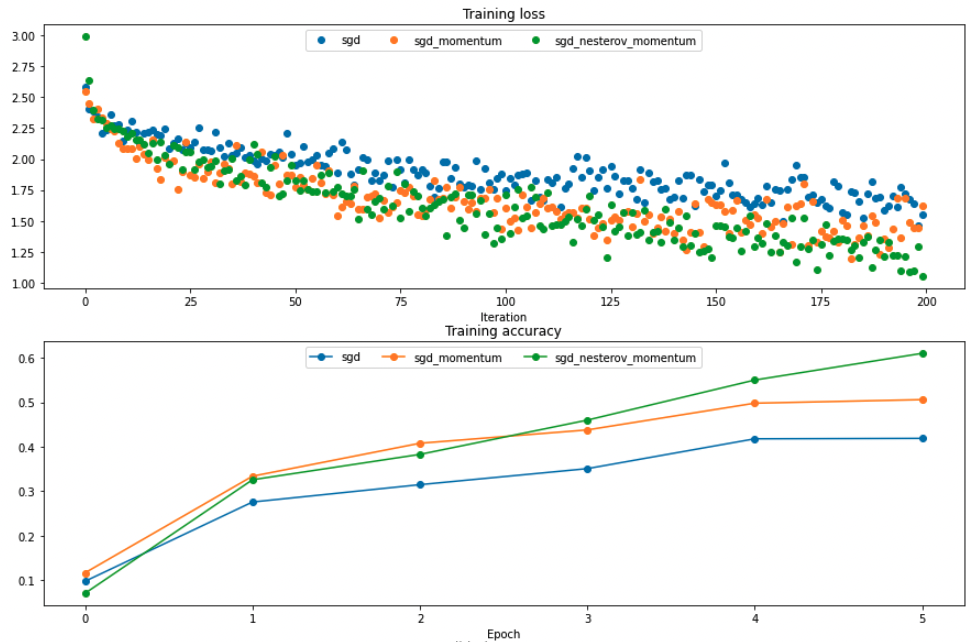

### Comparing SGD, SGD+NesterovMomentum, RMSProp, and Adam

Then, you will compare optimization with all algorithms.

### Easier optimization

Finally, train a 4 layer neural network with the different optimizers

You will find that it is much easier to achieve over 50% performance on CIFAR-10 than you did in HW3.

## Q2: Batch Normalization

### Batchnorm forward pass


First, **normalize** the unit activations:
$$
\hat{x}_{i}=\frac{x_{i}-\mu_{i}}{\sqrt{\sigma_{i}^{2}+\varepsilon}}
$$
with
$$
\mu_{i}=\frac{1}{m} \sum_{j=1}^{m} x_{i}^{(j)}, \quad \sigma_{i}^{2}=\frac{1}{m} \sum_{j=1}^{m}\left(x_{i}^{(j)}-\mu_{i}\right)^{2}
$$
and small $\varepsilon$ to prevent division by zero.

Second, **scale and shift** the normalized activations:
$$
y_{i}=\gamma_{i} \hat{x}_{i}+\beta_{i}
$$
where $\gamma_{i}$ and $\beta_{i}$ are learnable parameters.

In [ ]:
def batchnorm_forward(x, gamma, beta, bn_param):
    """
    Forward pass for batch normalization.
    """
    mode = bn_param['mode'] # train or test mode
    eps = bn_param.get('eps', 1e-5) # small epsilon to prevent division by zero
    momentum = bn_param.get('momentum', 0.9)

    # Calculate the running mean and variance of the minibatch.
    N, D = x.shape
    running_mean = bn_param.get('running_mean', np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get('running_var', np.zeros(D, dtype=x.dtype))

    out, cache = None, None

    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #

    if mode == 'train':

        # compute the mean and covariance from minibatch examples x
        mu =  # your code here
        var = # your code here

        # keep an exponentially decaying running mean and variance
        # these averages are used to normalize data at test-time
        running_mean = momentum * _ + (1-momentum) * _ # your code here
        running_var = momentum * _ + (1-momentum) * _ # your code here

        # normalize the activations x with the current mean and variance
        xn = # your code here

        # scale and shift the normalized activations
        out =  # your code here

        # store variables you need for the backward pass in the 'cache' variable
        cache = [_] # your code here

    elif mode == 'test':

        # calculate the testing time normalized activation

        # normalize using the running mean and variance from training statistics
        xn = # your code here

        # scale and shift appropriately
        out = # your code here

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    # Store the updated running means back into bn_param
    bn_param['running_mean'] = running_mean
    bn_param['running_var'] = running_var

    return out, cache

### Batchnorm backward pass
The easy ones:
$$
\begin{aligned}
\text{[dbeta]} \quad &
\frac{\partial \ell}{\partial \beta}=\sum_{j=1}^{m} \frac{\partial \ell}{\partial y^{(j)}}  
\quad [\text{dout}]\\
\text{[dgamma]}  \quad &
\frac{\partial \ell}{\partial \gamma}=\sum_{j=1}^{m} \frac{\partial \ell}{\partial y^{(j)}} \hat{x}^{(j)}
\quad \text{[dout, x, mu, var, eps]}
\end{aligned}
$$

The harder one:
$$
\begin{aligned}
\text{[dx]}  \quad
\frac{\partial \ell}{\partial x^{(j)}} &=\frac{\partial \ell}{\partial a^{(j)}}+\frac{\partial \sigma^{2}}{\partial x^{(j)}} \frac{\partial \ell}{\partial \sigma^{2}}+\frac{\partial \mu}{\partial x^{(j)}} \frac{\partial \ell}{\partial \mu} \\
&=\frac{1}{\sqrt{\sigma^{2}+\epsilon}} \frac{\partial \ell}{\partial \hat{x}^{(j)}}
+\frac{1}{m} \frac{\partial \ell}{\partial \mu}
+\frac{2\left(x^{(j)}-\mu\right)}{m} \frac{\partial \ell}{\partial \sigma^{2}} \\
&\quad \text{[var, eps, dxn] $+$ [dmu] $+$ [xc, dvar]}
\end{aligned}
$$

We can maintain some reused variables for computational efficiency:
$$
\begin{aligned}
\text{[xc]} \quad
& x^{(j)}-\mu \\
\text{[dout]} \quad
& \frac{\partial \ell}{\partial y^{(j)}} \\
\text{[dxn]} \quad
& \frac{\partial \ell}{\partial \hat{x}^{(j)}}
=\frac{\partial \ell}{\partial y^{(j)}} \gamma
\quad \text{[dout, gamma]} \\
\text{[dvar]} \quad
& \frac{\partial \ell}{\partial \sigma^{2}}
=\sum_{j=1}^{m}-\frac{1}{2} \frac{1}{\left(\sigma^{2}+\varepsilon\right)^{3 / 2}}\left(x^{(j)}-\mu\right) \frac{\partial \ell}{\partial \hat{x}^{(j)}}
\quad \text{[var, eps, xc, dxn]} \\
\text{[dmu]} \quad
& \frac{\partial \ell}{\partial \mu}=-\frac{1}{\sqrt{\sigma^{2}+\epsilon}} \sum_{j=1}^{m} \frac{\partial \ell}{\partial \hat{x}^{(j)}}-\frac{\partial \ell}{\partial \sigma^{2}} \frac{1}{m} \sum_{j=1}^{m} 2\left(x^{(j)}-\mu\right)
\quad \text{[var, eps, dxn] $-$ [dvar, xc]} \\
\end{aligned}
$$

In [ ]:
def batchnorm_backward(dout, cache):
    """
    Backward pass for batch normalization.
    """
    dx, dgamma, dbeta = None, None, None

    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #
    # first pull out relevant variables
    eps, mu, var, gamma, beta, x, xc, xn = cache
    N, D = dout.shape

    # the easy ones: dbeta, dgamma
    dbeta = np.sum(dout, axis=0)
    dgamma = # your code here

    # the hard one: dx
    dxn = # your code here
    dvar = # your code here
    dmu = # your code here

    dx = # your code here
    # ================================================================ #
    # End YOUR CODE HERE
    # ================================================================ #

    return dx, dgamma, dbeta

### Implement a fully connected neural network with batchnorm layers

In [ ]:
def __init__(self, hidden_dims, input_dim=3*32*32, num_classes=10,
           dropout=0, use_batchnorm=False, reg=0.0,
           weight_scale=1e-2, dtype=np.float32, seed=None):
    """
    Initialize a new FullyConnectedNet.
    """
    self.use_batchnorm = use_batchnorm
    self.use_dropout = dropout > 0
    self.reg = reg
    self.num_layers = 1 + len(hidden_dims)
    self.dtype = dtype
    self.params = {}

    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #
    self.params['W1'] = # your code here

    for your_condition: # your code here
        self.params['W' + str(i+1)] = # your code here
        self.params['b' + str(i+1)] = # your code here

        # the condition of BN
        if your_condition: # your code here
            self.params['gamma' + str(i+1)] =  # your code here
            self.params['beta' + str(i+1)] =  # your code here
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

In [ ]:
def loss(self, X, y=None):
    """
    Compute loss and gradient for the fully-connected net.
    """
    X = X.astype(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params and dropout param since they
    # behave differently during training and testing.
    if self.dropout_param is not None:
        self.dropout_param['mode'] = mode
    if self.use_batchnorm:
        for bn_param in self.bn_params:
            bn_param[mode] = mode

    scores = None

    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #
    layer_input = X
    relu_cache = []
    affine_cache = []
    bn_cache = []
    drop_cache = []

    for i in range(self.num_layers):
        layer_out, acache = affine_forward() # your code here

        # potentially batchnorm and ReLU and dropout
        if your condition here:
            # potentially batchnorm
            if self.use_batchnorm:
                layer_out, bcache = batchnorm_forward() # your code here

            # ReLU
            layer_out, rcache = relu_forward() # your code here

            # potentially dropout
            if self.use_dropout:
                layer_out, dcache = dropout_forward() # your code here

            layer_input = layer_out

        # last layer scores
        scores = layer_out
        # ================================================================ #
        # END YOUR CODE HERE
        # ================================================================ #

        # If test mode return early
        if mode == 'test':
            return scores

        loss, grads = 0.0, {}
        # ================================================================ #
        # YOUR CODE HERE:
        # ================================================================ #
        loss, grad = # your code here

        up_grad = # your code here

        for i in reversed(np.arange(self.num_layers)):
            # add regularization to loss
            loss += # your code here

            # backwards pass
            if your_condition: # your code here
                da, dw, db = affine_backward() # your code here
            else:
                da, dw, db = affine_backward() # your code here

                if self.use_dropout:
                    da = dropout_backward() # your code here

                dz = relu_backward() # your code here
                if self.use_batchnorm:
                    dz, dgamma, dbeta = batchnorm_backward() # your code here
                    grads['gamma' + str(i)] = # your code here
                    grads['beta' + str(i)] = # your code here

            grads['W' + str(i+1)] = # your code here
            grads['b' + str(i+1)] = # your code here

            up_grad = # your code here
        # ================================================================ #
        # END YOUR CODE HERE
        # ================================================================ #

        return loss, grads

### Training a deep fully connected network with batch normalization.

To see if batchnorm helps, let's train a deep neural network with and without batch normalization.

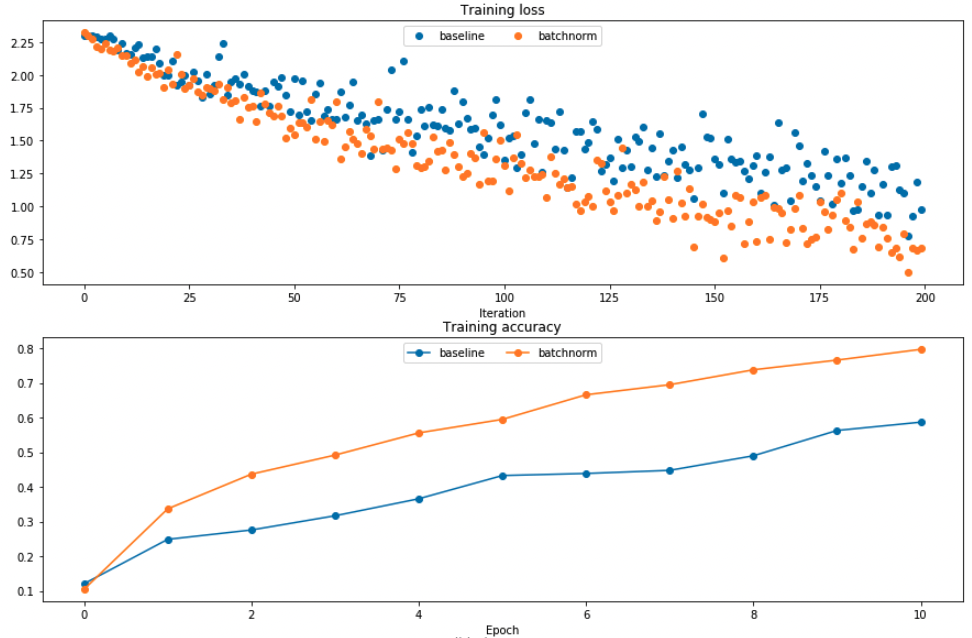

## Q3: Dropout
In this question, you will implement dropout.  Then we will ask you to train a network with batchnorm and dropout, and acheive over 55% accuracy on CIFAR-10.

### Dropout forward pass

Implement the training and test time dropout forward pass, `dropout_forward`, in `nndl/layers.py`.

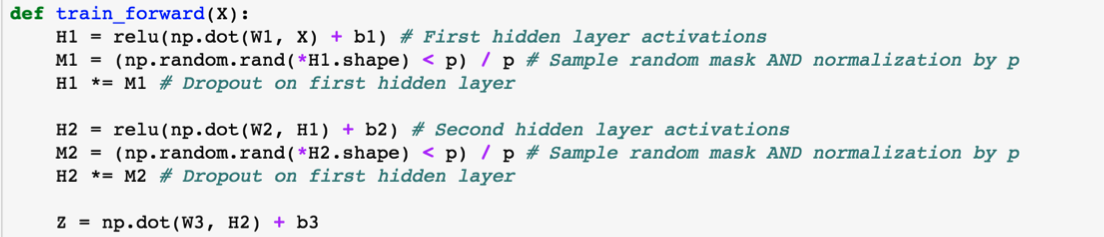

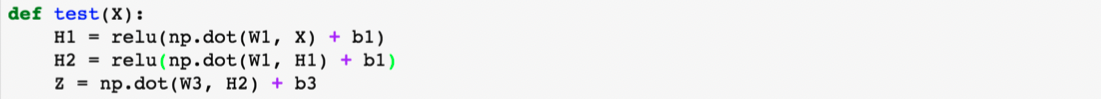

Note that here we use `< p` to simulate the probability of *keeping* eacn neuron output.

A common way to implement dropout is **inverted dropout** where the scaling by 1/p is done intraining. This causes the output to have the same expected value as if dropout was never been performed. Thus, testing looks the same irrespective of if we use dropout or not.

In [2]:
import numpy as np
p = 0.3
mask = np.random.rand(1000000) < p
remained = sum(mask) / len(mask)
print("the remained neurons: ", remained)

the remained neurons:  0.299807


In [ ]:
def dropout_forward(x, dropout_param):
    """
    Performs the forward pass for (inverted) dropout.
    """
    p, mode = dropout_param['p'], dropout_param['mode']
    mask = None
    out = None

    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #
    if mode == 'train':
        mask = # your code here
        out = # your code here

    elif mode == 'test':
        out = # your code here
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    cache = (dropout_param, mask)
    out = out.astype(x.dtype, copy=False)

    return out, cache

###  Dropout backward pass

Implement the backward pass, `dropout_backward`, in `nndl/layers.py`.  

In [ ]:
def dropout_backward(dout, cache):
    """
    Perform the backward pass for (inverted) dropout.
    """
    dropout_param, mask = cache
    mode = dropout_param['mode']

    dx = None
    # ================================================================ #
    # YOUR CODE HERE:
    # ================================================================ #
    if mode == 'train':
        dx = # your code here
    elif mode == 'test':
        dx = # your code here
    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #
    return dx

### Implement a fully connected neural network with dropout layers

Modify the `FullyConnectedNet()` class in `nndl/fc_net.py` to incorporate dropout.  

A dropout layer should be incorporated after every ReLU layer.  